<a href="https://www.kaggle.com/code/artyomrasskazov/practicum-1-4-russian-film-distribution?scriptVersionId=106018107" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import seaborn as sns

# Исследование данных о российском кинопрокате

## Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

Откроем первый датасет и убедимся, что всё в порядке.

In [2]:
df = pd.read_csv('../input/practicum/mkrf_movies.csv')
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Также откроем второй датасет.

In [3]:
df_shows = pd.read_csv('../input/practicum/mkrf_shows.csv')
df_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Посмотрим основную информацию об обоих датафреймах.

In [4]:
df_shows.info()
print()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 

Далее нам необходимо собрать обе таблицы в один датафрейм. Мерджить будем по колонке `puNumber`. Обратите внимание, что тип данных в этом поле различается у двух датафреймов. Т.е. сначала нужно преобразовать строки в целые числа в `df_mkrf_movies`.

Попытки изменить тип данных могут оказаться неудачными из-за не_цифровых символов. Напишем функцию, которая находит такие записи.

In [5]:
df[~df['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


В строке `804` видимо есть пробельные символы. Для их удаления удобно использовать строковый метод `.strip()`. В строке `1787` пропуск. Я пока не хочу ничего удалять, тем более, что датасет небольшой, поэтому просто заменим нулем. Затем приведем строки к целым числам функцией `to_numeric()`.

In [6]:
df.loc[804, 'puNumber'] = df.loc[804, 'puNumber'].strip()
df.loc[1797, 'puNumber'] = '0'

df['puNumber'] = pd.to_numeric(df['puNumber'])
df['puNumber'].dtype

dtype('int64')

Убедившись, что тип данных в обоих датафреймах совпадает, мы можем добавить в датафрейм с фильмами сведения о показах. Датафрейм `df_mkrf_shows` больше не нужен.

In [7]:
df = df.merge(df_shows, how='left')
del df_shows

## Шаг 2. Предобработка данных

### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Как видно из содержимого датафрейма и сводной информации, у нас есть рейтинг и дата премьеры фильма, хранящиеся в строковом формате.

**`ratings`**

Посмотрим какие значения включают в себя не только цифры и точку.

In [8]:
# False - не выводить пропуски
invalid_raitings = df[df['ratings'].str.contains('[^0-9.]').fillna(False)]
invalid_raitings

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29T12:00:00.000Z,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06T12:00:00.000Z,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия",1.740000e+03
1053,Песочный человек,121029212,2012-11-29T12:00:00.000Z,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15T12:00:00.000Z,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30T12:00:00.000Z,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы",4.295000e+03
1874,Короткие истории о любви 2,121002615,2015-02-13T12:00:00.000Z,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,1.429859e+06
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27T12:00:00.000Z,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама",5.287326e+08
2126,Поездка к матери,111002015,2015-03-02T12:00:00.000Z,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.000000e+00
2146,Главный,111003415,2015-03-27T12:00:00.000Z,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,10000000.0,40000000.0,Министерство культуры,94%,"фантастика,боевик,комедия",3.347500e+05
2438,Самый рыжий Лис,111012715,2015-07-30T12:00:00.000Z,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN


Часть данных хранится в формате процентов, хотя обычно для рейтингов используют десятибальную систему. Перепишем проценты в этих строках как доли от 10 баллов, а затем приведём всё к числу. Убедимся, что предельные значения находятся в диапазоне 1..10.

In [9]:
df.loc[invalid_raitings.index, 'ratings'] = invalid_raitings['ratings'].str[0] + '.' + invalid_raitings['ratings'].str[1]

df['ratings'] = pd.to_numeric(df['ratings'])

df['ratings'].describe()[['min', 'max']]

min    1.0
max    9.9
Name: ratings, dtype: float64

**`show_start_date`**

Дата премьеры фильма хранится в строке вида `2015-07-29T12:00:00.000Z`. Преобразуем в объект дататайм.

In [10]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['show_start_date'].dtype

dtype('<M8[ns]')

### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Покажем количество пропусков.

Количество пропусков по столбцам


title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

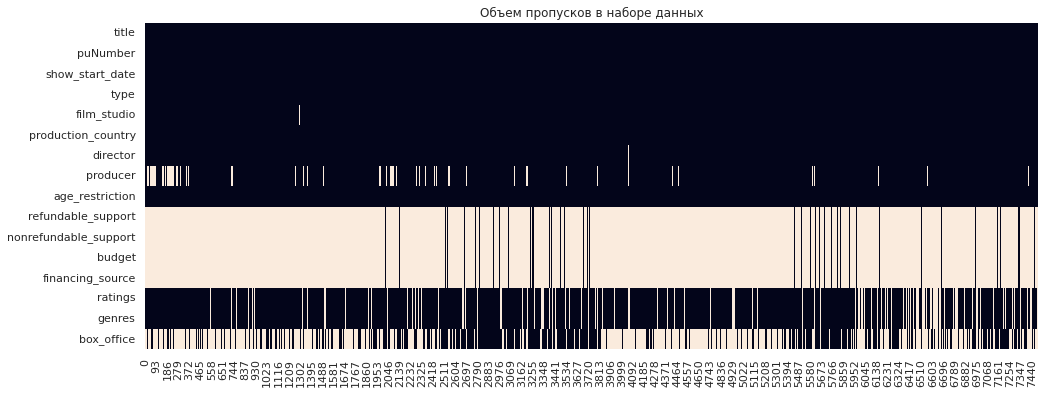

In [11]:
# Соберем информацию о пропусках в один датафрейм и визуализируем.

# TODO: Можно убрать столбцы с нулями.

df_nans = df.isna()

# TODO: подпись по Х не нужна, справа бы сумму столбца.

sns.set(rc = {'figure.figsize':(16,6)})
sns.heatmap(df_nans.transpose(), cbar=False).set_title('Объем пропусков в наборе данных')

print('Количество пропусков по столбцам')
df_nans.sum()

In [12]:
df_nans['year'] = df['show_start_date'].dt.year


df_nans['total_records'] = True

df_nans.groupby(by='year').agg(sum).transpose()

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
title,0,0,0,0,0,0,0,0,0,0
puNumber,0,0,0,0,0,0,0,0,0,0
show_start_date,0,0,0,0,0,0,0,0,0,0
type,0,0,0,0,0,0,0,0,0,0
film_studio,1,0,0,0,1,0,0,0,12,4
production_country,1,0,0,0,0,0,1,0,0,0
director,5,2,1,1,0,0,0,0,0,0
producer,40,15,26,89,189,77,54,34,14,30
age_restriction,0,0,0,0,0,0,0,0,0,0
refundable_support,985,622,593,628,791,619,757,464,835,860


Похоже, количество пропусков не сильно зависит от года

На тепловой карте видно, что пропуски в колонках `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` находятся на одних и тех же местах. Косвенно об этом говорит и матрица распределения пропусков по годам. Раз данные говорят, в том числе об объёме государственной поддержки, то скорее всего факт пропуска связан со страной.

In [13]:
# TODO: возможно можно написать как-то проще и нагляднее

tmp = df.budget.isna().rename('is_na').to_frame()

tmp['is_rus'] = df.production_country.str.contains('Россия')

display(tmp.groupby(['is_na']).agg(['sum', 'count']).set_axis(['Россия', 'Всего'], axis=1))

del tmp

,Россия,Всего
is_na,,
False,332,332
True,1653,7152


Информация по государственной поддержке есть только по российским фильмам, но у большинства российских фильмов нет информации о господдержке. Возможно большинство российских фильмов снималось без господдержки.

Посмотрим, можем ли мы заполнить пропуски в категориальных данных о фильмах, взяв недостающую информацию в повторах фильмов (по названию).

In [14]:
# TODO: мог бы и получше имя выбрать

# 1: создаём список фильмов, в которых по целевому столбцу есть пропуски
# 2: возвращаем строки, с этими фильмами

def get_other_records(df: pd.DataFrame, column_name: str) -> pd.DataFrame:
    
    na_in_movies = df.loc[df[column_name].isna(), 'title']
    
    return df[df['title'].isin(na_in_movies)].sort_values(by='title')

В следующих столбцe `director` не много пропусков. Посмотрим на них:

In [15]:
get_other_records(df, 'director')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0


К сожелению по этому столбцу не получится заболнить пропуски. Напишем функцию, которую мы сможем применить для заполнения пропусков в других категориальных столбцах. Группировать фильмы будем по названию и режисёру.

In [16]:
def fill_by_group(df, columns):
    for column in columns:
        return get_other_records(df, column).groupby(['title', 'director'])[column].transform('first')

Оценим эффективность такого подхода с помощью функции для подсчёта пропусков до обработки и после.

In [17]:
def fill_by_group_effective(df, columns):
    for column in columns:
        print('Пропусков в', column)
        print('    до:    ', df[column].isna().sum())
        print('    после: ', fill_by_group(df, [column]).isna().sum())

In [18]:
fill_by_group_effective(df, ['film_studio', 'production_country', 'producer', 'ratings', 'genres'])

Пропусков в film_studio
    до:     18
    после:  18
Пропусков в production_country
    до:     2
    после:  2
Пропусков в producer
    до:     568
    после:  568
Пропусков в ratings
    до:     967
    после:  967
Пропусков в genres
    до:     976
    после:  976


К сожалению этот метод заполнения пропусков не эффективен для этого набора данных.

### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [19]:
print('Количество дублирующихся строк:', df.duplicated().sum())

df.nunique()

Количество дублирующихся строк: 0


title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5490
production_country        950
director                 4811
producer                 5349
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            3
ratings                    84
genres                    742
box_office               2938
dtype: int64

Повторы в `title` объясняются тем, что один и тот же фильм могут начать показывать в разное время под разной лицензией и/или разными прокатчиками.

In [20]:
df.loc[df['title'].duplicated(keep=False)].sort_values(by='title').tail()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4505,Я ненавижу день святого Валентина,221139210,2010-12-03 12:00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.0,"мелодрама,комедия",NaN
1704,"Я, снова я и мама",121030213,2013-11-21 12:00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"комедия,мелодрама,драма",NaN
1703,"Я, снова я и мама",121013116,2016-05-23 12:00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"комедия,мелодрама,драма",NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**`puNumber`** наверное должен быть уникальным. Под одним номером прокатного удостоверения числятся два разных фильма с одной датой премьеры. Возможно сыграл человеческий фактор при заполнении какой-нибудь формы. Этот номер не имеет принципиального значения, оставлю как есть.

In [21]:
df.loc[df['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


`show_start_date`. Вполне реально начать показ нескольких фильмов в одну и ту же дату. 

In [22]:
df['production_country'].tail()

7481             Великобритания
7482                        США
7483               США - Канада
7484    Республика Кипр, Россия
7485    Республика Кипр, Россия
Name: production_country, dtype: object

In [23]:
df['production_country'] = df['production_country'].dropna().apply(lambda x: ', '.join([x.strip() for x in x.split('-')]))
df['production_country'].tail()

7481             Великобритания
7482                        США
7483                США, Канада
7484    Республика Кипр, Россия
7485    Республика Кипр, Россия
Name: production_country, dtype: object

Уберем возможно лишние пробелы между списками внутри ячейки. Есть возможность отсортировать `lambda x: ', '.join(sorted([x.strip() for x in x.split(',')]))`, тогда бы мы избавились от неявных дубликатов, связанных с порядком значений. Однако, я не уверен на 100%, что порядок не имеет значение.

In [24]:
for column in ['director', 'producer', 'film_studio', 'production_country', 'genres']:
    
    print('уникальные значения в', column)
    print('   было', df[column].nunique())
    
    df[column] = df[column].dropna().apply(lambda x: ', '.join([x.strip() for x in x.split(',')]))
    
    print('  стало', df[column].nunique())
    print()

уникальные значения в director
   было 4811
  стало 4800

уникальные значения в producer
   было 5349
  стало 5333

уникальные значения в film_studio
   было 5490
  стало 5461

уникальные значения в production_country
   было 813
  стало 812

уникальные значения в genres
   было 742
  стало 742



`type`

In [25]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [26]:
df['type'] = df['type'].str.strip()
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

`age_restriction` и `financing_source` выглядят хорошо.

In [27]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [28]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

сделано выше

### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [29]:
invalid_budget = df[df['budget'] < (df['refundable_support'] + df['nonrefundable_support'])]
invalid_budget

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик, драма, криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия, фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм, приключения, фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия, драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия, мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия, мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Есть ряд фильмов, которые получали господдержку, но в бюджете стоит 0. Выясним в каком объёме обычно оказывалась поддержка и заменим средним процентом от поддержки. Суммируем оба вида господдержки.

Чаще всего доля участия государства в бюджете составляет 0.6140376284219444



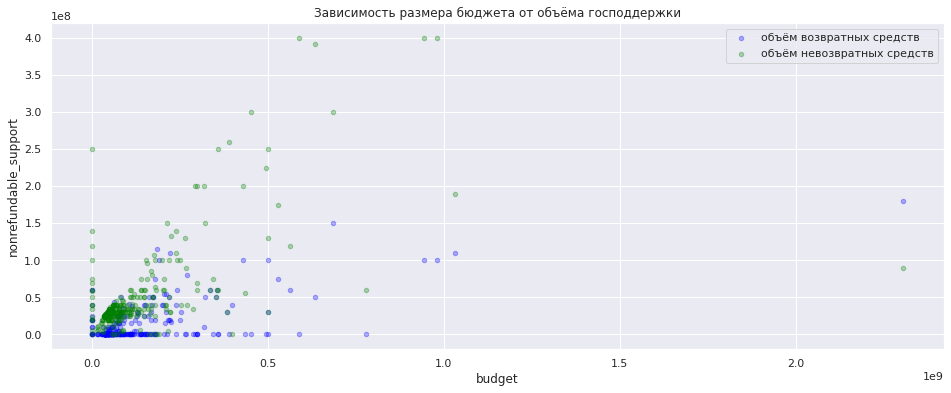

In [30]:
ax = df.plot.scatter(
    title='Зависимость размера бюджета от объёма господдержки',
    label='объём возвратных средств',
    x='budget',
    y='refundable_support',
    color='blue',
    alpha=0.3
)

df.plot.scatter(
    label='объём невозвратных средств',
    x='budget', y='nonrefundable_support',
    color='green',
    alpha=0.3,
    ax=ax)

df['support_percentage'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

support_percentage = df['support_percentage'].median()

print('Чаще всего доля участия государства в бюджете составляет', support_percentage)
print()

In [31]:
df.loc[invalid_budget.index, 'budget'] = (df.loc[invalid_budget.index, 'refundable_support'] + df.loc[invalid_budget.index, 'nonrefundable_support']) / support_percentage

df.loc[invalid_budget.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,3.745699e+07,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,inf
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,1.221424e+08,Фонд кино,6.6,драма,4.461635e+08,inf
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,1.302852e+08,Фонд кино,7.8,"боевик, драма, криминал",1.965724e+08,inf
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,3.257129e+07,Фонд кино,6.2,"комедия, фэнтези",6.741897e+07,inf
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,2.605704e+08,Фонд кино,4.6,"мультфильм, приключения, фэнтези",1.844876e+08,inf
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,9.608532e+07,Фонд кино,6.3,"комедия, драма",1.957739e+06,inf
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,5.699976e+07,Фонд кино,5.1,"комедия, мелодрама",7.293778e+07,inf
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,9.771388e+06,Министерство культуры,4.3,комедия,1.536293e+07,inf
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,1.139995e+08,Фонд кино,6.3,"комедия, мелодрама",7.029905e+07,inf
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,4.071412e+08,Фонд кино,5.6,фантастика,1.038321e+09,inf


### Шаг 2.6. Добавьте новые столбцы

- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [32]:
df['year'] = df['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [33]:
def add_main(df, columns):
    for column in columns:
        df[f'main_{column}'] = df[column].dropna().apply(lambda x: x.split(', ')[0])
    return df

In [34]:
df = add_main(df, ['director', 'genres'])

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Сделано выше

## Шаг 3. Проведите исследовательский анализ данных


In [35]:
df_pivot = df.loc[df['box_office'].notna(), ['year', 'box_office']] \
                .groupby('year') \
                .agg(['count', 'sum', 'mean', 'median'])

df_pivot.columns = df_pivot.columns.get_level_values(1)

In [36]:
df_pivot

,count,sum,mean,median
year,,,,
2010,105,2.428654e+06,2.313004e+04,1700.000
2011,109,1.410276e+07,1.293832e+05,3000.000
2012,128,6.955423e+06,5.433924e+04,5660.000
2013,184,2.979971e+07,1.619549e+05,3522.500
2014,279,7.444952e+09,2.668442e+07,18160.000
2015,465,3.949737e+10,8.494057e+07,4920933.000
2016,526,4.786630e+10,9.100057e+07,3846679.410
2017,357,4.856371e+10,1.360328e+08,9968340.000
2018,475,4.966840e+10,1.045651e+08,8891102.210


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Доля фильмов, для которых есть информация о сборах: 0.42


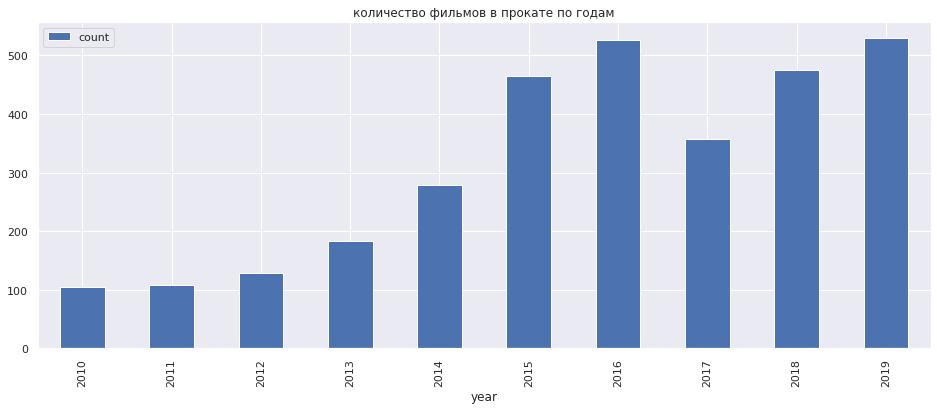

In [37]:
df_pivot.plot(title='количество фильмов в прокате по годам', kind='bar', y='count')
print(f'Доля фильмов, для которых есть информация о сборах: {df.box_office.notna().mean():.2f}')

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

В 2010 году сумма сборов была минимальной, в 2018 максимальной.


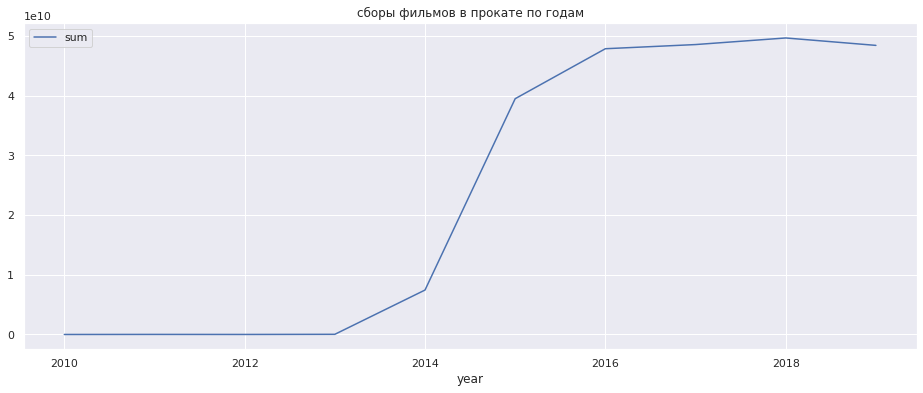

In [38]:
df_pivot.plot(title='сборы фильмов в прокате по годам', kind='line', y='sum')
print(f"В {df_pivot['sum'].idxmin()} году сумма сборов была минимальной, в {df_pivot['sum'].idxmax()} максимальной.")

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

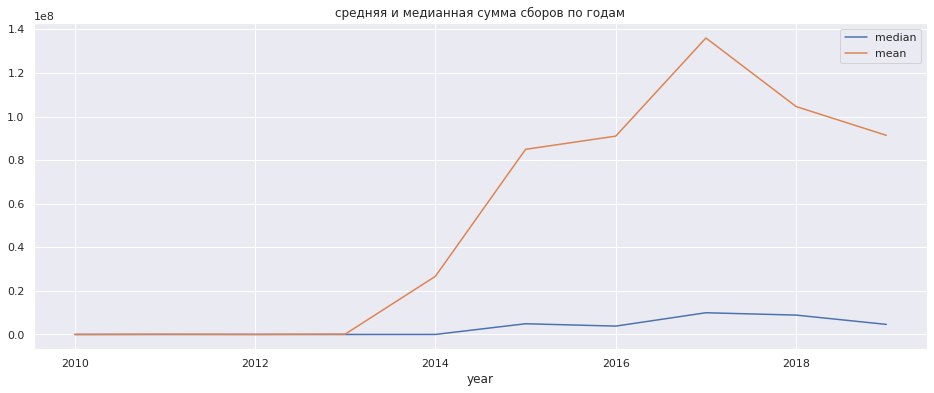

In [39]:
df_pivot.plot(title='средняя и медианная сумма сборов по годам', kind='line', y=['median', 'mean'])
print()

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

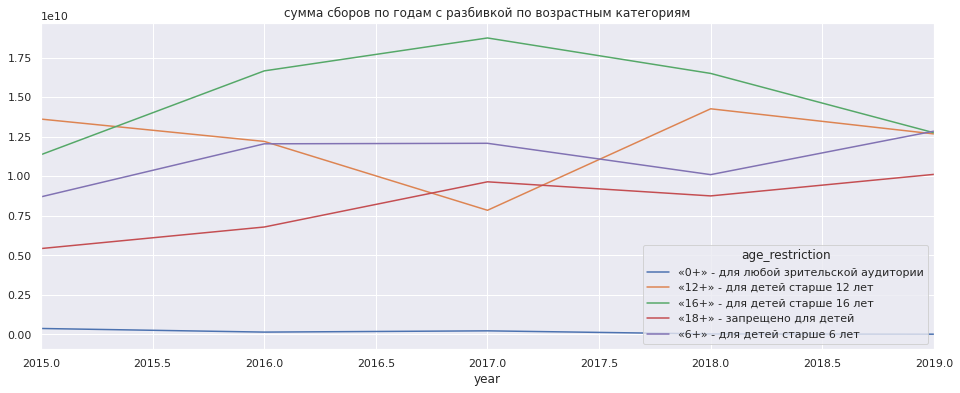

In [40]:
df[df['box_office'].notna()] \
    .pivot_table(index='year',
                columns='age_restriction',
                values='box_office',
                aggfunc='sum') \
    .plot(title='сумма сборов по годам с разбивкой по возрастным категориям', kind='line', xlim=[2015, 2019])
print()

## Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

## Шаг 5. Напишите общий вывод